<a href="https://colab.research.google.com/github/DimasAryoWardoyo/UAS-Big-Data-Mining---ANALISIS-SENTIMEN-ULASAN-PELANGGAN/blob/main/23_11_5755_UAS_BDDM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**UAS BIG DATA & DATA MINING**

**Nama: Dimas Aryo Wardoyo**

**NIM: 23.11.5755**

---

# **ANALISIS SENTIMEN ULASAN PELANGGAN**

**Metode Klasifikasi untuk Mendukung Pengambilan Keputusan Operasional dan Manajemen**

**1. Import Library**

In [5]:
import pandas as pd
import numpy as np

# Visualisasi
import matplotlib.pyplot as plt
import seaborn as sns

# Text Processing
import re
import string

# NLP Bahasa Indonesia
!pip install Sastrawi
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

# Evaluation
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


**2. Load Dataset Public**

Kaggle – Indonesian E-Commerce Reviews

In [14]:
url = "https://raw.githubusercontent.com/indobenchmark/indonlu/master/dataset/smsa_doc-sentiment-prosa/train_preprocess.tsv"
df = pd.read_csv(url, sep='\t', header=None, names=['Text', 'Sentiment'])

df.head()

,Text,Sentiment
0,warung ini dimiliki oleh pengusaha pabrik tahu...,positive
1,mohon ulama lurus dan k212 mmbri hujjah partai...,neutral
2,lokasi strategis di jalan sumatera bandung . t...,positive
3,betapa bahagia nya diri ini saat unboxing pake...,positive
4,duh . jadi mahasiswa jangan sombong dong . kas...,negative


In [11]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=df)

https://docs.google.com/spreadsheets/d/1Dl1Re_s-qpJRAS_jcib-a1q6MBGJYsMkON91Q7V0m44/edit#gid=0


**3. Data Understanding**


In [12]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 2 columns):
 #   Column                                                                                                                                                                                                                                                                                                                                                                                                                Non-Null Count  Dtype 
---  ------                                                                                                                                                                                                                                                                                                                                                                                                                --------------  ----- 
 0   warung ini dimiliki

In [15]:
df['Sentiment'].value_counts()


,count
Sentiment,
positive,6416
negative,3436
neutral,1148


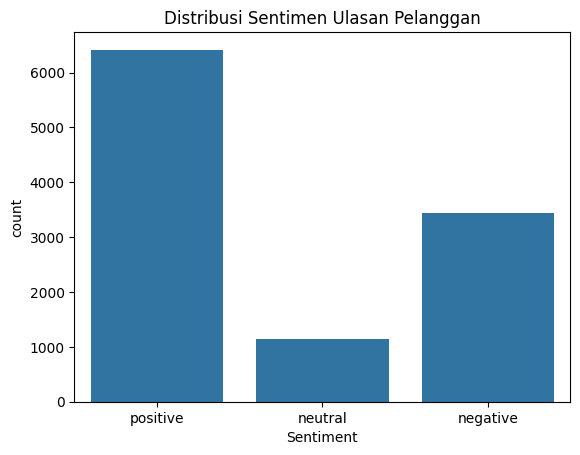

In [16]:
sns.countplot(x='Sentiment', data=df)
plt.title("Distribusi Sentimen Ulasan Pelanggan")
plt.show()


**4. Data Preprocessing**

4.1 Cleaning Text

In [18]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r'\d+', '', text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = text.strip()
    return text

4.2 Stopword Removal & Stemming (Indonesia)

In [19]:
stop_factory = StopWordRemoverFactory()
stopwords = stop_factory.get_stop_words()

stem_factory = StemmerFactory()
stemmer = stem_factory.create_stemmer()

def preprocess_text(text):
    text = clean_text(text)
    tokens = text.split()
    tokens = [word for word in tokens if word not in stopwords]
    tokens = [stemmer.stem(word) for word in tokens]
    return " ".join(tokens)


4.3 Terapkan Preprocessing

In [22]:
df['clean_review'] = df['Text'].apply(preprocess_text)
df[['Text', 'clean_review']].head()

,Text,clean_review
0,warung ini dimiliki oleh pengusaha pabrik tahu...,warung milik usaha pabrik tahu puluh tahun ken...
1,mohon ulama lurus dan k212 mmbri hujjah partai...,mohon ulama lurus k mmbri hujjah partai apa di...
2,lokasi strategis di jalan sumatera bandung . t...,lokasi strategis jalan sumatera bandung tempat...
3,betapa bahagia nya diri ini saat unboxing pake...,betapa bahagia nya diri unboxing paket barang ...
4,duh . jadi mahasiswa jangan sombong dong . kas...,duh jadi mahasiswa jangan sombong dong kasih k...


**5. Feature Extraction – TF-IDF**

In [23]:
X = df['clean_review']
y = df['Sentiment']

tfidf = TfidfVectorizer(max_features=5000)
X_tfidf = tfidf.fit_transform(X)


**6. Split Data**

In [24]:
X_train, X_test, y_train, y_test = train_test_split(
    X_tfidf, y, test_size=0.2, random_state=42
)


**7. Modeling – Naive Bayes**

In [25]:
model = MultinomialNB()
model.fit(X_train, y_train)


MultinomialNB()

**8. Prediction**

In [26]:
y_pred = model.predict(X_test)


**9. Metric Evaluation**

9.1 Accuracy

In [27]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.8031818181818182


9.2 Classification Report

In [28]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

    negative       0.72      0.73      0.72       680
     neutral       0.94      0.38      0.55       239
    positive       0.84      0.92      0.88      1281

    accuracy                           0.80      2200
   macro avg       0.83      0.68      0.71      2200
weighted avg       0.81      0.80      0.79      2200



9.3 Confusion Matrix

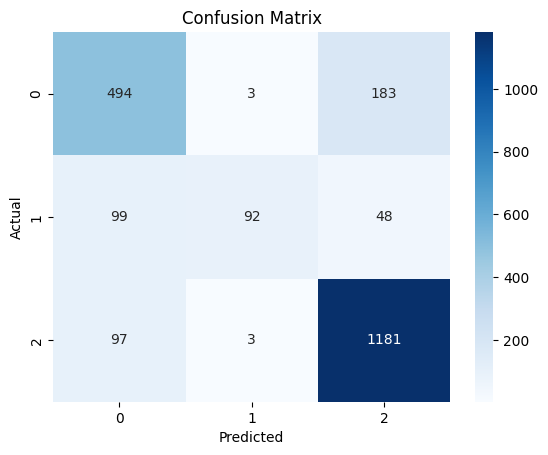

In [29]:
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()




---


Hasil analisis sentimen menunjukkan bahwa ulasan pelanggan dapat diklasifikasikan ke dalam sentimen positif dan negatif secara akurat. Sentimen negatif mengindikasikan adanya permasalahan operasional seperti pelayanan dan kualitas produk, sedangkan sentimen positif mencerminkan kepuasan pelanggan. Informasi ini dapat digunakan oleh manajemen sebagai dasar pengambilan keputusan dalam meningkatkan kualitas layanan operasional.